In [1]:
# Imports 📦
import tensorflow as tf

import numpy as np

In [4]:
# Toy Data 🏠 (X1🛌, X2🛁, X3🚗)
toy_data = [[2,1,1], [3,2,2], [4, 3, 2],[3,1,1]] # X_train

X_train = np.array(toy_data)
X_train

array([[2, 1, 1],
       [3, 2, 2],
       [4, 3, 2],
       [3, 1, 1]])

In [7]:
X_train.shape
#X_train.shape[1] - מה שרוצים


(4, 3)

In [11]:
# House Prices 💰 y
prices = [300000, 450000, 600000,320000] # y_train
y_train= np.array(prices)
y_train.shape

(4,)

In [12]:
# Build Model 🚀
model = tf.keras.Sequential ([
    tf.keras.Input(shape=(3,)),#לא חובה
    tf.keras.layers.Dense (100,activation="relu"),
    tf.keras.layers.Dense(1,activation=None)
])


In [15]:
# Compile Model 🔧
model.compile(
    loss=tf.keras.losses.mse, #mse
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics = ["mae"] #rmse
)

In [34]:
# Train Model 🎯
history = model.fit(X_train,y_train, epochs=5, verbose =1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 185335840768.0000 - mae: 413708.0000
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 185139036160.0000 - mae: 413486.7500
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 184935448576.0000 - mae: 413257.7812
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - loss: 184724963328.0000 - mae: 413020.9062
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - loss: 184507531264.0000 - mae: 412776.0312


In [35]:
history.history

{'loss': [185335840768.0,
  185139036160.0,
  184935448576.0,
  184724963328.0,
  184507531264.0],
 'mae': [413708.0, 413486.75, 413257.78125, 413020.90625, 412776.03125]}

In [24]:
type(history.history)

dict

In [25]:
history.history.keys()

dict_keys(['loss', 'mae'])

In [31]:
history

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Price: $4,114.35


In [ ]:
history = model.fit(X_train,y_train, epochs=10)#, verbose=0) 
                                   

In [26]:
import matplotlib.pyplot as plt

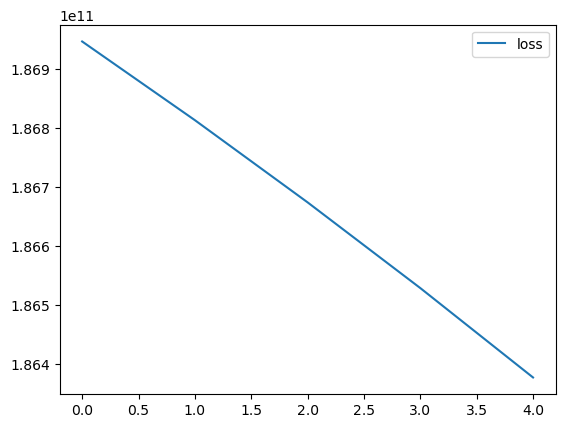

In [30]:
plt.plot(history.history['loss'], label = "loss")
#plt.plot(history.history['mae'], label = "mae")
plt.legend()

In [37]:
#הערכה
#model.evaluate(X_test,y_test)
model.evaluate(X_train,y_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 184283070464.0000 - mae: 412523.1250


[184283070464.0, 412523.125]

In [38]:
loss, metric = model.evaluate(X_train,y_train)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 184283070464.0000 - mae: 412523.1250


In [39]:
loss

184283070464.0

In [40]:
metric

412523.125

In [41]:
#5 Predicted Price 🔮
predicted_price = model.predict(np.array([[2, 2, 1]]))[0][0] # Predict for 2🛌, 2🛁, 1🚗
print(f"Predicted Price: ${predicted_price:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Predicted Price: $4,114.35


In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,505 (5.88 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,004 (3.93 KB)